In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
# df = pd.read_csv('power_gen_data/7698_source_data.csv')
df = pd.read_csv('power_gen_data/NDAP_REPORT_7698.csv',index_col=0,parse_dates=True)
df.head()

C:\Users\parit\AppData\Local\Temp\ipykernel_20764\2407238863.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('power_gen_data/NDAP_REPORT_7698.csv',index_col=0,parse_dates=True)


,Country,SourceYear,SourceMonth,SourceCalendarDay,Type of power generation,Monitored capacity,Capacity under long outage,New capacity under stabilization or completion of balance works,Capacity of power generation from prime movers (pm),Capacity of power generation from fuel oil (fo),...,Gross sum of maximum power generated,Net sum of maximum power generated,Maximum power output as percentage of capacity on line,Percentage of monitered maximum power output,YearCode,Year,MonthCode,Month,CalendarDayCode,Calendar Day
ROWID,,,,,,,,,,,,,,,,,,,,,
1,India,2021,Apr-2021,01-Apr-2021,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,2021,"Financial Year (Apr - Mar), 2021",202101,"April, 2021",20210401,2021-04-01
2,India,2021,Apr-2021,02-Apr-2021,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,2021,"Financial Year (Apr - Mar), 2021",202101,"April, 2021",20210402,2021-04-02
3,India,2021,Apr-2021,03-Apr-2021,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,2021,"Financial Year (Apr - Mar), 2021",202101,"April, 2021",20210403,2021-04-03
4,India,2021,Apr-2021,04-Apr-2021,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,2021,"Financial Year (Apr - Mar), 2021",202101,"April, 2021",20210404,2021-04-04
5,India,2021,Apr-2021,05-Apr-2021,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,2021,"Financial Year (Apr - Mar), 2021",202101,"April, 2021",20210405,2021-04-05


### Data Cleaning

In [3]:
# drop columns ROWID, Country, SourceYear, SourceMonth, YearCode, Year, MonthCode, Month, CalendarDayCode, Calendar Day
df.drop(['SourceCalendarDay','Country','SourceYear','SourceMonth','YearCode','Year','MonthCode','Month','CalendarDayCode'],axis=1,inplace=True)
df.head()

,Type of power generation,Monitored capacity,Capacity under long outage,New capacity under stabilization or completion of balance works,Capacity of power generation from prime movers (pm),Capacity of power generation from fuel oil (fo),Capacity of power generation from other sources,Total capacity of power generation from all sources,Capacity outage as percent of monitered,Operational capacity of power generation,Gross sum of maximum power generated,Net sum of maximum power generated,Maximum power output as percentage of capacity on line,Percentage of monitered maximum power output,Calendar Day
ROWID,,,,,,,,,,,,,,,
1,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,2021-04-01
2,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,2021-04-02
3,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,2021-04-03
4,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,2021-04-04
5,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,2021-04-05


In [4]:
# convert Calendar Day to datetime for time series analysis
df['Calendar Day'] = pd.to_datetime(df['Calendar Day'])
df.head()

,Type of power generation,Monitored capacity,Capacity under long outage,New capacity under stabilization or completion of balance works,Capacity of power generation from prime movers (pm),Capacity of power generation from fuel oil (fo),Capacity of power generation from other sources,Total capacity of power generation from all sources,Capacity outage as percent of monitered,Operational capacity of power generation,Gross sum of maximum power generated,Net sum of maximum power generated,Maximum power output as percentage of capacity on line,Percentage of monitered maximum power output,Calendar Day
ROWID,,,,,,,,,,,,,,,
1,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,2021-04-01
2,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,2021-04-02
3,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,2021-04-03
4,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,2021-04-04
5,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,2021-04-05


In [5]:
# make Calendar Day the first column
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.head()

,Calendar Day,Type of power generation,Monitored capacity,Capacity under long outage,New capacity under stabilization or completion of balance works,Capacity of power generation from prime movers (pm),Capacity of power generation from fuel oil (fo),Capacity of power generation from other sources,Total capacity of power generation from all sources,Capacity outage as percent of monitered,Operational capacity of power generation,Gross sum of maximum power generated,Net sum of maximum power generated,Maximum power output as percentage of capacity on line,Percentage of monitered maximum power output
ROWID,,,,,,,,,,,,,,,
1,2021-04-01,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
2,2021-04-02,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
3,2021-04-03,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
4,2021-04-04,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
5,2021-04-05,Thermal_Coal Lignite,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0


In [6]:
# sort according to Calendar Day
df.sort_values(by=['Calendar Day'],inplace=True)
df.head()

,Calendar Day,Type of power generation,Monitored capacity,Capacity under long outage,New capacity under stabilization or completion of balance works,Capacity of power generation from prime movers (pm),Capacity of power generation from fuel oil (fo),Capacity of power generation from other sources,Total capacity of power generation from all sources,Capacity outage as percent of monitered,Operational capacity of power generation,Gross sum of maximum power generated,Net sum of maximum power generated,Maximum power output as percentage of capacity on line,Percentage of monitered maximum power output
ROWID,,,,,,,,,,,,,,,
8627,2017-09-01,Hydro,44753.42,1082.9,NaN,1162.65,1771.2,941.50,3875.35,8.66,40878.07,30133.87,29832.53,72.98,66.66
8798,2017-09-01,Thermal_Coal Lignite,193466.50,5814.0,12180.0,9569.00,60638.0,0.00,70207.00,36.29,123259.50,130683.16,118921.68,96.48,61.47
2619,2017-09-01,Nuclear,6780.00,540.0,NaN,1140.00,1640.0,0.00,2780.00,41.00,4000.00,4297.30,3803.11,95.08,56.09
1970,2017-09-01,Thermal_Diesel,837.63,NaN,NaN,0.00,0.0,0.00,0.00,0.00,837.63,46.05,45.13,5.39,5.39
6468,2017-09-01,Thermal_Gas Liquid,25130.88,3472.3,NaN,0.00,80.0,9863.16,9943.16,39.57,15187.72,9801.56,9605.53,63.25,38.22


In [7]:
# list of columns with missing values
df.columns[df.isnull().any()].tolist()

['Capacity under long outage',
 'New capacity under stabilization or completion of balance works',
 'Capacity of power generation from prime movers (pm)',
 'Capacity of power generation from fuel oil (fo)',
 'Capacity of power generation from other sources',
 'Total capacity of power generation from all sources',
 'Capacity outage as percent of monitered',
 'Operational capacity of power generation',
 'Gross sum of maximum power generated',
 'Net sum of maximum power generated',
 'Maximum power output as percentage of capacity on line',
 'Percentage of monitered maximum power output']

In [8]:
# list number of missing values per column
df.isnull().sum()

Calendar Day                                                          0
Type of power generation                                              0
Monitored capacity                                                    0
Capacity under long outage                                         2551
New capacity under stabilization or completion of balance works    9439
Capacity of power generation from prime movers (pm)                1435
Capacity of power generation from fuel oil (fo)                    1435
Capacity of power generation from other sources                    1435
Total capacity of power generation from all sources                1435
Capacity outage as percent of monitered                            1435
Operational capacity of power generation                             13
Gross sum of maximum power generated                                367
Net sum of maximum power generated                                  367
Maximum power output as percentage of capacity on line          

In [9]:
# display one row where the column Net sum of maximum power generated has a missing value
df[df['Net sum of maximum power generated'].isnull()].head()

,Calendar Day,Type of power generation,Monitored capacity,Capacity under long outage,New capacity under stabilization or completion of balance works,Capacity of power generation from prime movers (pm),Capacity of power generation from fuel oil (fo),Capacity of power generation from other sources,Total capacity of power generation from all sources,Capacity outage as percent of monitered,Operational capacity of power generation,Gross sum of maximum power generated,Net sum of maximum power generated,Maximum power output as percentage of capacity on line,Percentage of monitered maximum power output
ROWID,,,,,,,,,,,,,,,
10769,2017-09-22,Thermal_Diesel,837.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10774,2017-09-22,Nuclear,6780.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10762,2021-03-30,Thermal_Coal Lignite,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10763,2021-03-31,Thermal_Coal Lignite,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-01,Thermal_Coal Lignite,0.00,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0


In [10]:
# export sorted data to csv
# df.to_csv('power_gen_data/7698_source_data_sorted.csv')

In [11]:
# drop rows with missing values in the column Operational capacity of power generation and Percentage of monitered maximum power output
df.dropna(subset=['Operational capacity of power generation','Percentage of monitered maximum power output'],inplace=True)

df.isnull().sum()

Calendar Day                                                          0
Type of power generation                                              0
Monitored capacity                                                    0
Capacity under long outage                                         2538
New capacity under stabilization or completion of balance works    9426
Capacity of power generation from prime movers (pm)                1422
Capacity of power generation from fuel oil (fo)                    1422
Capacity of power generation from other sources                    1422
Total capacity of power generation from all sources                1422
Capacity outage as percent of monitered                            1422
Operational capacity of power generation                              0
Gross sum of maximum power generated                                363
Net sum of maximum power generated                                  363
Maximum power output as percentage of capacity on line          

In [14]:
# The code will use the 'transform' method to apply the mean function directly after grouping by the month extracted inline.

# Convert the 'Calendar Day' column to datetime format assuming the format is dd-mm-yyyy
# df['Calendar Day'] = pd.to_datetime(df['Calendar Day'], format='%d-%m-%Y')

# Calculate the mean 'Net sum of maximum power generated' for each month and replace missing values
df['Net sum of maximum power generated'] = df.groupby(df['Calendar Day'].dt.month)['Net sum of maximum power generated'] \
                                            .transform(lambda x: x.fillna(x.mean()))

df['Gross sum of maximum power generated'] = df.groupby(df['Calendar Day'].dt.month)['Gross sum of maximum power generated'] \
                                            .transform(lambda x: x.fillna(x.mean()))

df.isnull().sum()

Calendar Day                                                          0
Type of power generation                                              0
Monitored capacity                                                    0
Capacity under long outage                                         2538
New capacity under stabilization or completion of balance works    9426
Capacity of power generation from prime movers (pm)                1422
Capacity of power generation from fuel oil (fo)                    1422
Capacity of power generation from other sources                    1422
Total capacity of power generation from all sources                1422
Capacity outage as percent of monitered                            1422
Operational capacity of power generation                              0
Gross sum of maximum power generated                                  0
Net sum of maximum power generated                                    0
Maximum power output as percentage of capacity on line          

In [15]:
# replace missing values in the column 'Capacity under long outage' and 'New capacity under stabilization or completion of balance works' with 0
df['Capacity under long outage'].fillna(0,inplace=True)
df['New capacity under stabilization or completion of balance works'].fillna(0,inplace=True)

df.isnull().sum()

Calendar Day                                                          0
Type of power generation                                              0
Monitored capacity                                                    0
Capacity under long outage                                            0
New capacity under stabilization or completion of balance works       0
Capacity of power generation from prime movers (pm)                1422
Capacity of power generation from fuel oil (fo)                    1422
Capacity of power generation from other sources                    1422
Total capacity of power generation from all sources                1422
Capacity outage as percent of monitered                            1422
Operational capacity of power generation                              0
Gross sum of maximum power generated                                  0
Net sum of maximum power generated                                    0
Maximum power output as percentage of capacity on line          

In [16]:
# display the value in the column 'Type of power generation' for every missing value in the column 'Capacity of power generation from prime movers (pm)'
df[df['Capacity of power generation from prime movers (pm)'].isnull()]['Type of power generation'].unique()

array(['Thermal_Diesel'], dtype=object)

In [20]:
# fill in the missing values in the columns 'Capacity of power generation from prime movers (pm)' , 'Capacity of power generation from fuel oil (fo)', 'Capacity of power generation from other sources', 'Total capacity of power generation from all sources' and 'Capacity outage as percent of monitered' with the mean of the respective columns in the same month
df['Capacity of power generation from prime movers (pm)'] = df.groupby(df['Calendar Day'].dt.month)['Capacity of power generation from prime movers (pm)'] \
                                            .transform(lambda x: x.fillna(x.mean()))

df['Capacity of power generation from fuel oil (fo)'] = df.groupby(df['Calendar Day'].dt.month)['Capacity of power generation from fuel oil (fo)'] \
                                            .transform(lambda x: x.fillna(x.mean()))

df['Capacity of power generation from other sources'] = df.groupby(df['Calendar Day'].dt.month)['Capacity of power generation from other sources'] \
                                            .transform(lambda x: x.fillna(x.mean()))

df['Total capacity of power generation from all sources'] = df.groupby(df['Calendar Day'].dt.month)['Total capacity of power generation from all sources'] \
                                            .transform(lambda x: x.fillna(x.mean()))

df['Capacity outage as percent of monitered'] = df.groupby(df['Calendar Day'].dt.month)['Capacity outage as percent of monitered'] \
                                            .transform(lambda x: x.fillna(x.mean()))

df.isnull().sum()

Calendar Day                                                       0
Type of power generation                                           0
Monitored capacity                                                 0
Capacity under long outage                                         0
New capacity under stabilization or completion of balance works    0
Capacity of power generation from prime movers (pm)                0
Capacity of power generation from fuel oil (fo)                    0
Capacity of power generation from other sources                    0
Total capacity of power generation from all sources                0
Capacity outage as percent of monitered                            0
Operational capacity of power generation                           0
Gross sum of maximum power generated                               0
Net sum of maximum power generated                                 0
Maximum power output as percentage of capacity on line             0
Percentage of monitered maximum po

In [21]:
# Extract the year from 'Calendar Day' for grouping
df['Year'] = df['Calendar Day'].dt.year

# List of columns for which you want to generate summary statistics
columns_to_describe = ['Monitored capacity', 'Capacity under long outage', 'Operational capacity of power generation',
                       'Operational capacity of power generation', 'Gross sum of maximum power generated',
                       'Net sum of maximum power generated', 'Maximum power output as percentage of capacity on line',
                       'Percentage of monitered maximum power output']

# Generate yearly summary statistics for the specified columns
yearly_stats = df.groupby('Year')[columns_to_describe].describe().unstack()

# Generate overall summary statistics for the entire dataset
overall_stats = df[columns_to_describe].describe()

# This is how you would get the yearly mean, median, standard deviation, minimum, and maximum
yearly_mean = df.groupby('Year')[columns_to_describe].mean()
yearly_median = df.groupby('Year')[columns_to_describe].median()
yearly_std = df.groupby('Year')[columns_to_describe].std()
yearly_min = df.groupby('Year')[columns_to_describe].min()
yearly_max = df.groupby('Year')[columns_to_describe].max()

# For the entire dataset
overall_mean = df[columns_to_describe].mean()
overall_median = df[columns_to_describe].median()
overall_std = df[columns_to_describe].std()
overall_min = df[columns_to_describe].min()
overall_max = df[columns_to_describe].max()

In [25]:
print(overall_mean)
print(overall_median)
print(overall_std)
print(overall_min)
print(overall_max)

Monitored capacity                                        52425.227143
Capacity under long outage                                 3361.073317
Operational capacity of power generation                  37196.233227
Operational capacity of power generation                  37196.233227
Gross sum of maximum power generated                      36040.202253
Net sum of maximum power generated                        33329.151297
Maximum power output as percentage of capacity on line       66.427669
Percentage of monitered maximum power output                 45.827758
dtype: float64
Monitored capacity                                        24869.21
Capacity under long outage                                 1037.00
Operational capacity of power generation                   7689.14
Operational capacity of power generation                   7689.14
Gross sum of maximum power generated                       6496.99
Net sum of maximum power generated                         6267.70
Maximum power o

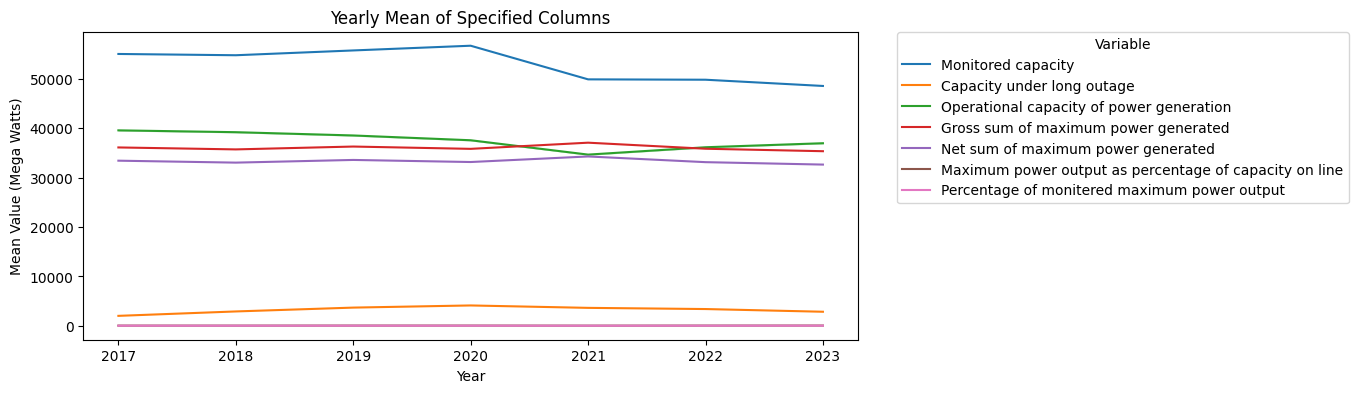

In [32]:
# Calculate yearly means for the specified columns
yearly_means = df.groupby('Year')[columns_to_describe].mean().reset_index()

# Convert the DataFrame from wide to long format
yearly_means_long = pd.melt(yearly_means, id_vars=['Year'], value_vars=columns_to_describe,
                            var_name='Variable', value_name='Mean')

# Plotting
plt.figure(figsize=(10, 4))

# Create a line plot using the long-form DataFrame
sns.lineplot(data=yearly_means_long, x='Year', y='Mean', hue='Variable')

# move the legend to the right
plt.title('Yearly Mean of Specified Columns')
plt.xlabel('Year')
plt.ylabel('Mean Value (Mega Watts)')
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.legend(title='Variable')
plt.show()

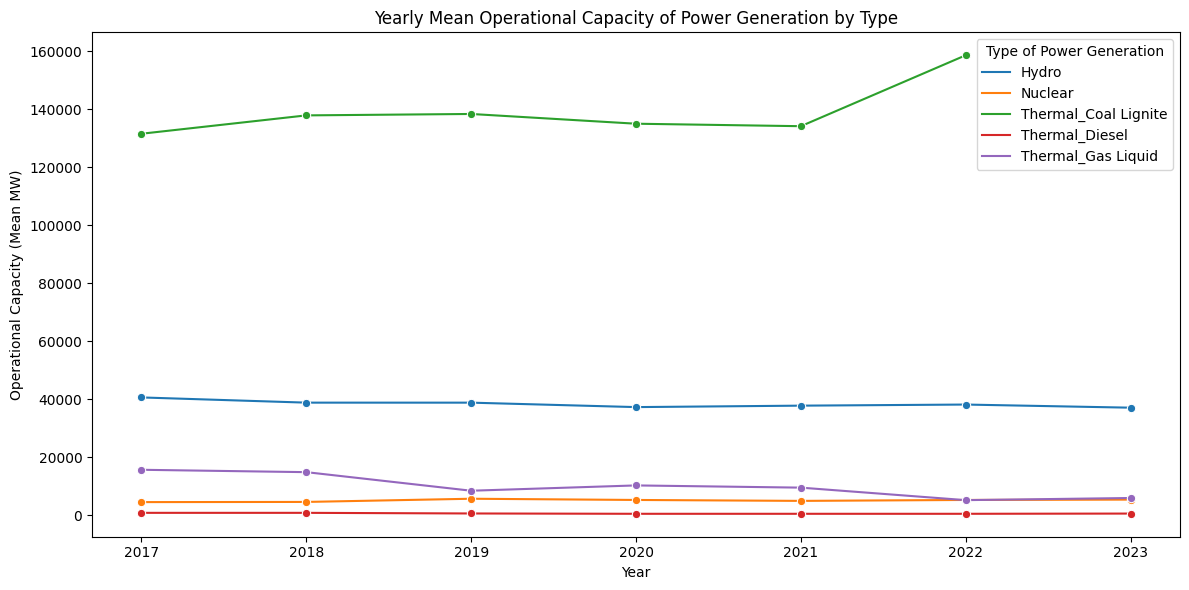

In [36]:
# Extract the year from 'Calendar Day' for grouping
df['Year'] = df['Calendar Day'].dt.year

# Now, group by 'Year' and 'Type of power generation' and calculate the mean operational capacities
yearly_capacity_mean = df.groupby(['Year', 'Type of power generation'])['Operational capacity of power generation'].median().reset_index()

# Specify the types of power generation you're interested in
specific_types = ['Thermal_Coal Lignite', 'Hydro', 'Nuclear', 'Thermal_Diesel', 'Thermal_Gas Liquid']  # Replace with your actual power generation types
yearly_capacity_filtered = yearly_capacity_mean[yearly_capacity_mean['Type of power generation'].isin(specific_types)]

# Now, create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=yearly_capacity_filtered,
    x='Year',
    y='Operational capacity of power generation',
    hue='Type of power generation',
    marker='o'
)

plt.title('Yearly Mean Operational Capacity of Power Generation by Type')
plt.xlabel('Year')
plt.ylabel('Operational Capacity (Mean MW)')
# plt.legend(title='Type of Power Generation', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(title='Type of Power Generation')
plt.tight_layout()  # Adjust the padding of the plot
plt.show()

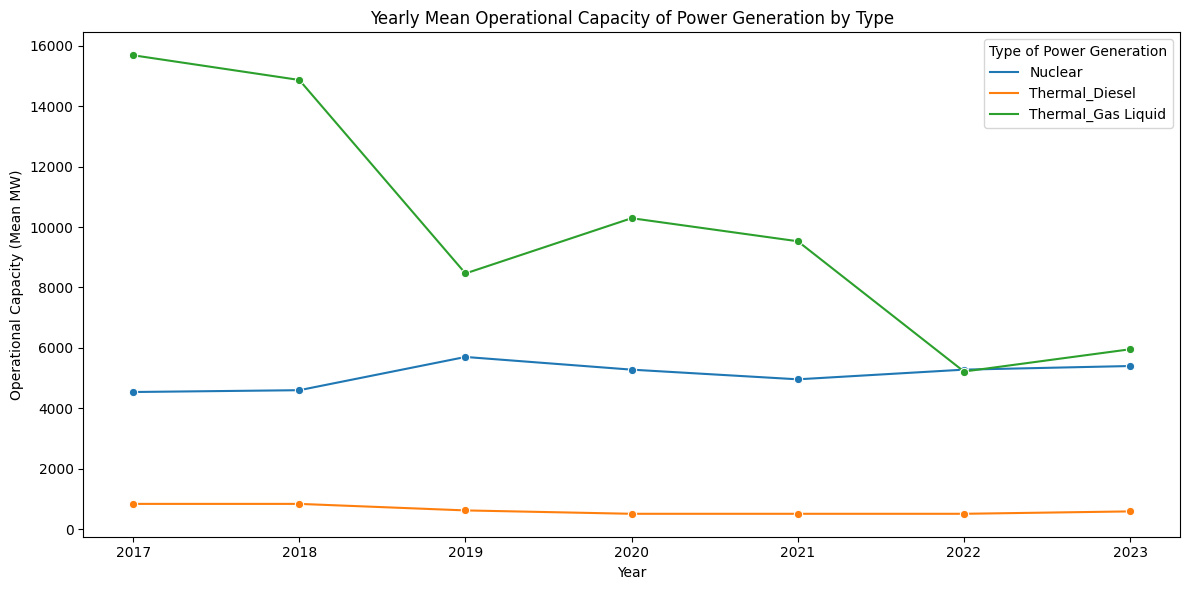

In [37]:
# Extract the year from 'Calendar Day' for grouping
df['Year'] = df['Calendar Day'].dt.year

# Now, group by 'Year' and 'Type of power generation' and calculate the mean operational capacities
yearly_capacity_mean = df.groupby(['Year', 'Type of power generation'])['Operational capacity of power generation'].median().reset_index()

# Specify the types of power generation you're interested in
specific_types = ['Nuclear', 'Thermal_Diesel', 'Thermal_Gas Liquid']  # Replace with your actual power generation types
yearly_capacity_filtered = yearly_capacity_mean[yearly_capacity_mean['Type of power generation'].isin(specific_types)]

# Now, create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=yearly_capacity_filtered,
    x='Year',
    y='Operational capacity of power generation',
    hue='Type of power generation',
    marker='o'
)

plt.title('Yearly Mean Operational Capacity of Power Generation by Type')
plt.xlabel('Year')
plt.ylabel('Operational Capacity (Mean MW)')
# plt.legend(title='Type of Power Generation', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(title='Type of Power Generation')
plt.tight_layout()  # Adjust the padding of the plot
plt.show()

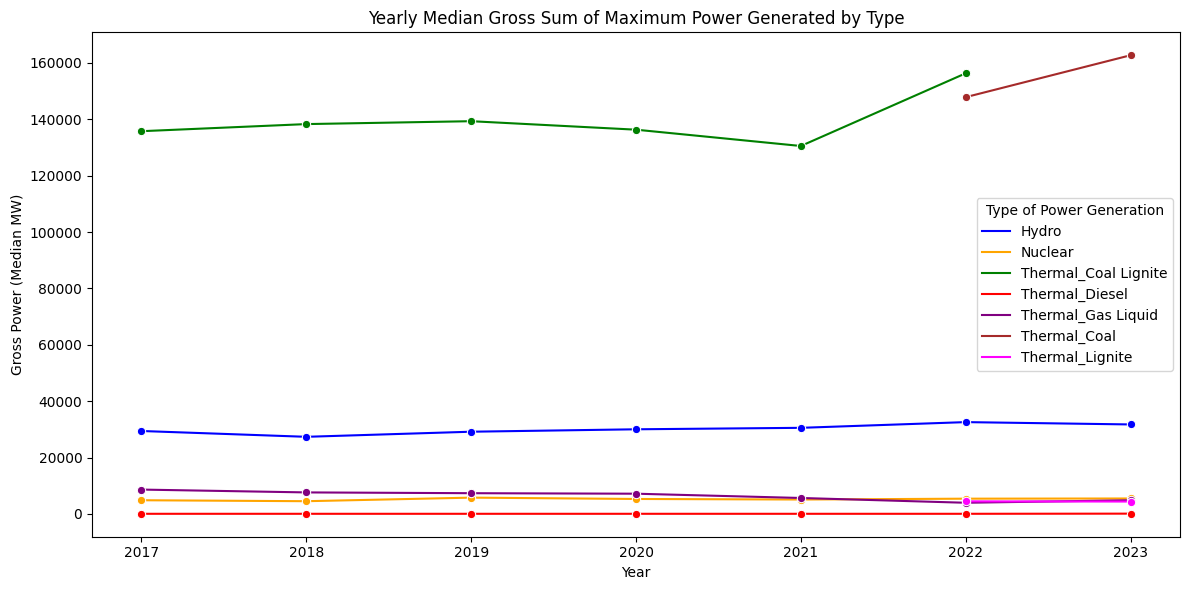

In [69]:
# Extract the year from 'Calendar Day' for grouping
df['Year'] = df['Calendar Day'].dt.year

# Now, group by 'Year' and 'Type of power generation' and calculate the mean operational capacities
yearly_capacity_mean = df.groupby(['Year', 'Type of power generation'])['Gross sum of maximum power generated'].median().reset_index()

# Specify the types of power generation you're interested in
specific_types = ['Thermal_Coal Lignite', 'Hydro', 'Nuclear', 'Thermal_Diesel', 'Thermal_Gas Liquid', 'Thermal_Coal', 'Thermal_Lignite']  # Replace with your actual power generation types
yearly_capacity_filtered = yearly_capacity_mean[yearly_capacity_mean['Type of power generation'].isin(specific_types)]

color_palette = {
    'Thermal_Coal Lignite': 'green',
    'Hydro': 'blue',
    'Thermal_Diesel': 'red',
    'Thermal_Gas Liquid': 'purple',
    'Nuclear': 'orange',
    'Thermal_Coal': 'brown',
    'Thermal_Lignite': 'magenta'
}

# Now, create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=yearly_capacity_filtered,
    x='Year',
    y='Gross sum of maximum power generated',
    hue='Type of power generation',
    palette=color_palette,
    marker='o'
)

plt.title('Yearly Median Gross Sum of Maximum Power Generated by Type')
plt.xlabel('Year')
plt.ylabel('Gross Power (Median MW)')
# plt.legend(title='Type of Power Generation', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(title='Type of Power Generation')
plt.tight_layout()  # Adjust the padding of the plot
plt.show()

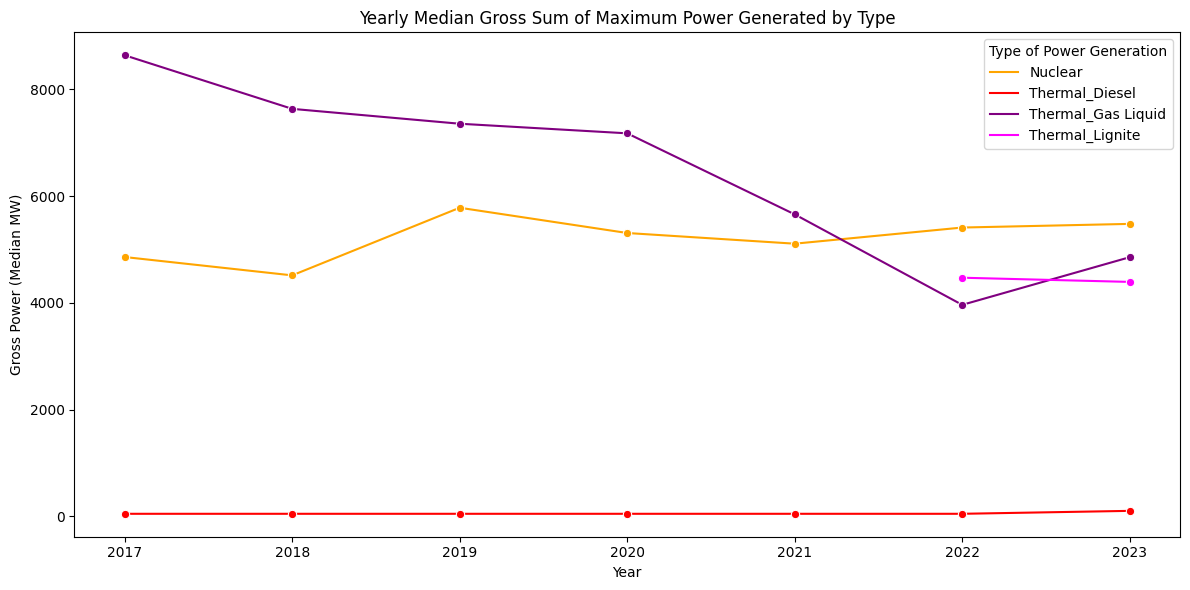

In [70]:
# Extract the year from 'Calendar Day' for grouping
df['Year'] = df['Calendar Day'].dt.year

# Now, group by 'Year' and 'Type of power generation' and calculate the mean operational capacities
yearly_capacity_mean = df.groupby(['Year', 'Type of power generation'])['Gross sum of maximum power generated'].median().reset_index()

# Specify the types of power generation you're interested in
specific_types = ['Nuclear', 'Thermal_Diesel', 'Thermal_Gas Liquid', 'Thermal_Lignite']  # Replace with your actual power generation types
yearly_capacity_filtered = yearly_capacity_mean[yearly_capacity_mean['Type of power generation'].isin(specific_types)]

color_palette = {
    'Thermal_Diesel': 'red',
    'Thermal_Gas Liquid': 'purple',
    'Nuclear': 'orange',
    'Thermal_Lignite': 'magenta'
}

# Now, create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=yearly_capacity_filtered,
    x='Year',
    y='Gross sum of maximum power generated',
    hue='Type of power generation',
    palette=color_palette,
    marker='o'
)

plt.title('Yearly Median Gross Sum of Maximum Power Generated by Type')
plt.xlabel('Year')
plt.ylabel('Gross Power (Median MW)')
# plt.legend(title='Type of Power Generation', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(title='Type of Power Generation')
plt.tight_layout()  # Adjust the padding of the plot
plt.show()

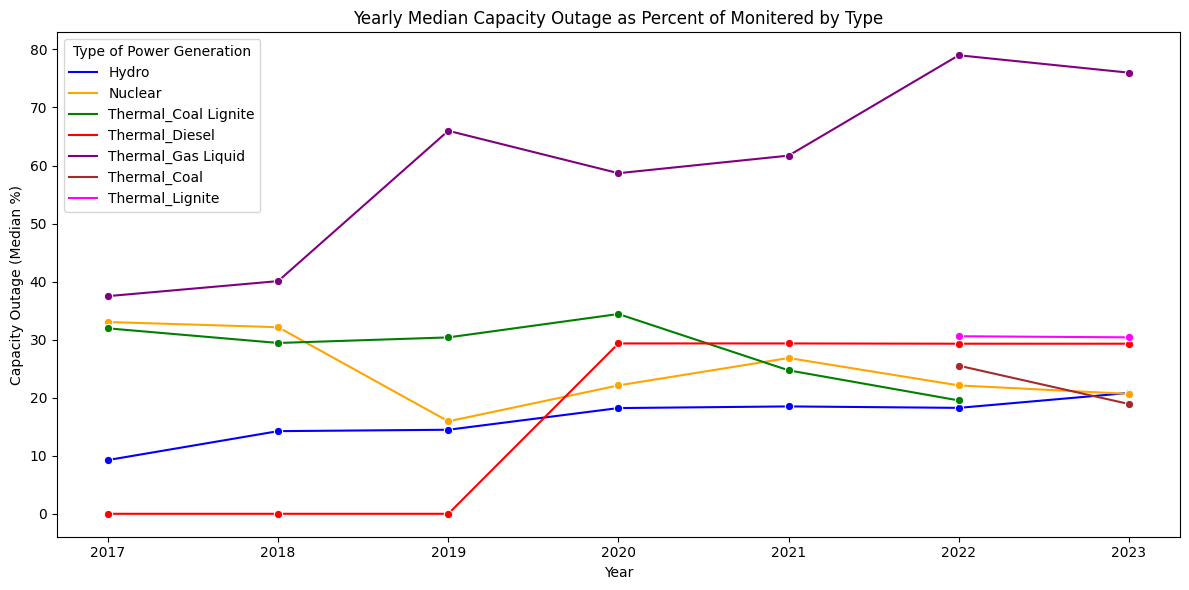

In [71]:
# Extract the year from 'Calendar Day' for grouping
df['Year'] = df['Calendar Day'].dt.year

# Now, group by 'Year' and 'Type of power generation' and calculate the mean operational capacities
yearly_capacity_mean = df.groupby(['Year', 'Type of power generation'])['Capacity outage as percent of monitered'].median().reset_index()

# Specify the types of power generation you're interested in
specific_types = ['Thermal_Coal Lignite', 'Hydro', 'Nuclear', 'Thermal_Diesel', 'Thermal_Gas Liquid', 'Thermal_Coal', 'Thermal_Lignite']  # Replace with your actual power generation types
yearly_capacity_filtered = yearly_capacity_mean[yearly_capacity_mean['Type of power generation'].isin(specific_types)]

color_palette = {
    'Thermal_Coal Lignite': 'green',
    'Hydro': 'blue',
    'Thermal_Diesel': 'red',
    'Thermal_Gas Liquid': 'purple',
    'Nuclear': 'orange',
    'Thermal_Coal': 'brown',
    'Thermal_Lignite': 'magenta'
}

# Now, create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=yearly_capacity_filtered,
    x='Year',
    y='Capacity outage as percent of monitered',
    hue='Type of power generation',
    palette=color_palette,
    marker='o'
)

plt.title('Yearly Median Capacity Outage as Percent of Monitered by Type')
plt.xlabel('Year')
plt.ylabel('Capacity Outage (Median %)')
# plt.legend(title='Type of Power Generation', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(title='Type of Power Generation')
plt.tight_layout()  # Adjust the padding of the plot
plt.show()

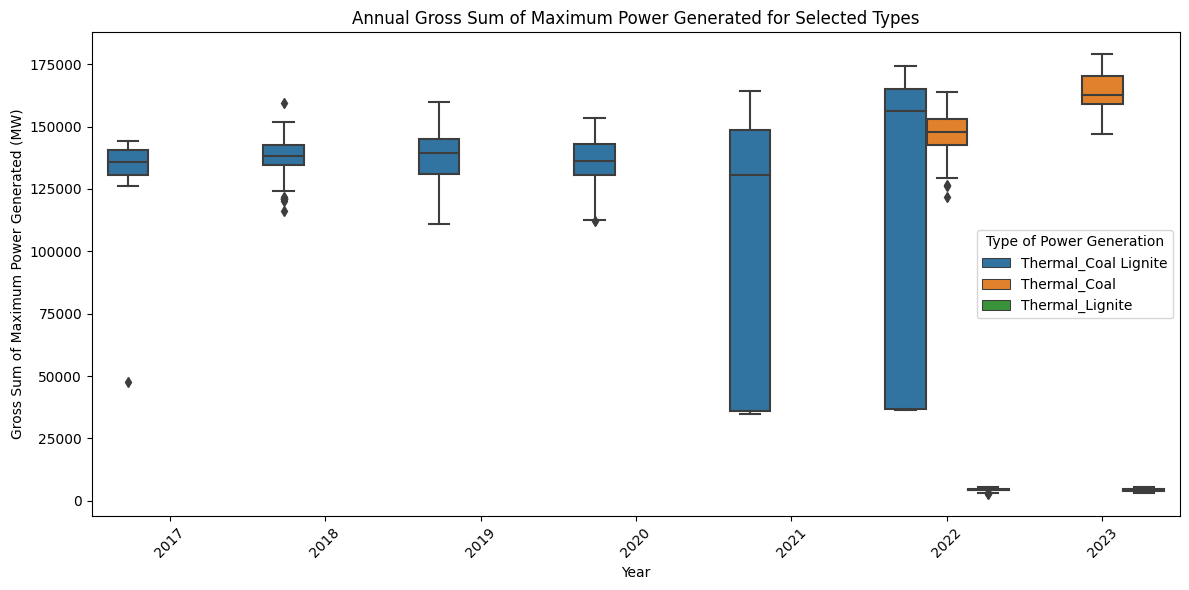

In [66]:
types_of_interest = ['Thermal_Coal Lignite', 'Thermal_Coal', 'Thermal_Lignite']  # Replace with the types of power generation of your interest

# Filter the DataFrame for the selected types of power generation
df_filtered = df[df['Type of power generation'].isin(types_of_interest)]

# Extract year from 'Calendar Day'
# df_filtered['Year'] = df_filtered['Calendar Day'].dt.year

# Create the box plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as necessary
sns.boxplot(
    data=df_filtered,
    x='Year',
    y='Gross sum of maximum power generated',
    hue='Type of power generation'
)

plt.title('Annual Gross Sum of Maximum Power Generated for Selected Types')
plt.xlabel('Year')
plt.ylabel('Gross Sum of Maximum Power Generated (MW)')
plt.legend(title='Type of Power Generation')
plt.xticks(rotation=45)  # Rotate the x-ticks for better readability if necessary
plt.tight_layout()  # Adjust the padding of the plot if necessary
plt.show()

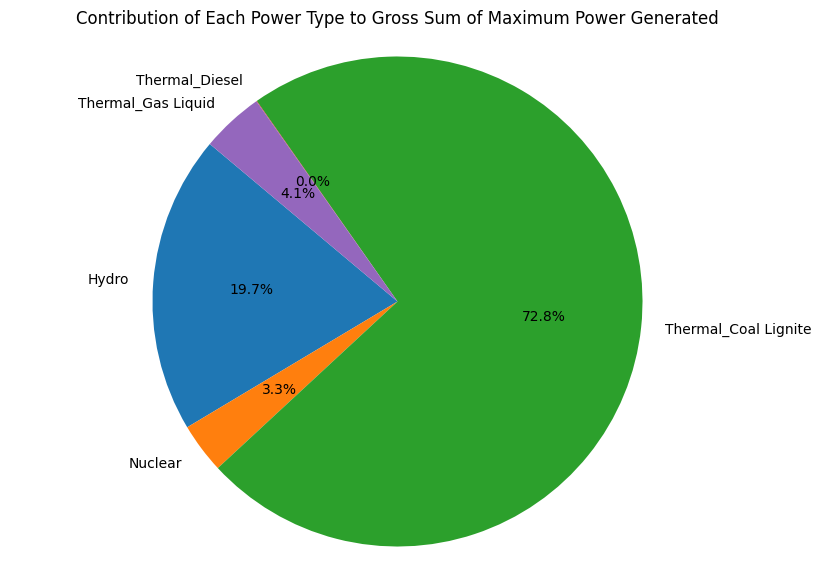

In [76]:
# Load your dataset
# df = pd.read_csv('path_to_your_dataset.csv')

# Filter out the types of power you don't want to include
types_to_exclude = ['Thermal_Coal', 'Thermal_Lignite']
filtered_df = df[~df['Type of power generation'].isin(types_to_exclude)]

# Aggregate the data to get the sum of 'Gross sum of maximum power generated' for each power type
power_generation_totals = filtered_df.groupby('Type of power generation')['Gross sum of maximum power generated'].sum()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(power_generation_totals, labels=power_generation_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Contribution of Each Power Type to Gross Sum of Maximum Power Generated')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()